In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [50]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/448/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/1145/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/1145/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/1145'}},
  'code': None,
  'crestUrl': None,
  'name': 'Accrington Stanley',
  'shortName': None,
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/365/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/365/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/365'}},
  'code': None,
  'crestUrl': 'https://upload.wikimedia.org/wikipedia/en/4/48/Colchester_United_FC_logo.svg',
  'name': 'Colchester United FC',
  'shortName': 'Colchester',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/1144/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/1144/players'},
   'self': {'href': 'http://api.football-da

In [51]:
len(teams)

24

In [52]:
for i, team in enumerate(teams):
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    losses = 0
    for f in fixtures:
        if f['status'] == 'FINISHED':
            if team['name'] == f['homeTeamName']:
                if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam']:
                        losses += 1
            else:
                if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam']:
                        losses += 1
    print(i, 'Team "{}", {} losses'.format(team['name'], losses))
    team['losses'] = losses

0 Team "Accrington Stanley", 9 losses
1 Team "Colchester United FC", 11 losses
2 Team "Stevenage FC", 15 losses
3 Team "Newport County", 10 losses
4 Team "Morecambe FC", 14 losses
5 Team "Cheltenham Town", 15 losses
6 Team "Luton Town", 6 losses
7 Team "Yeovil Town", 16 losses
8 Team "Forest Green Rovers", 18 losses
9 Team "Barnet FC", 20 losses
10 Team "Exeter City", 11 losses
11 Team "Cambridge United", 13 losses
12 Team "Crewe Alexandra FC", 21 losses
13 Team "Mansfield Town", 6 losses
14 Team "Crawley Town", 14 losses
15 Team "Port Vale FC", 17 losses
16 Team "Coventry City FC", 12 losses
17 Team "Notts County", 8 losses
18 Team "Chesterfield FC", 20 losses
19 Team "Grimsby Town", 17 losses
20 Team "Carlisle United", 12 losses
21 Team "Swindon Town FC", 14 losses
22 Team "Wycombe Wanderers", 8 losses
23 Team "Lincoln City", 9 losses


In [56]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'losses': team['losses']})
team_for_pd

[{'losses': 9, 'name': 'Accrington Stanley'},
 {'losses': 11, 'name': 'Colchester United FC'},
 {'losses': 15, 'name': 'Stevenage FC'},
 {'losses': 10, 'name': 'Newport County'},
 {'losses': 14, 'name': 'Morecambe FC'},
 {'losses': 15, 'name': 'Cheltenham Town'},
 {'losses': 6, 'name': 'Luton Town'},
 {'losses': 16, 'name': 'Yeovil Town'},
 {'losses': 18, 'name': 'Forest Green Rovers'},
 {'losses': 20, 'name': 'Barnet FC'},
 {'losses': 11, 'name': 'Exeter City'},
 {'losses': 13, 'name': 'Cambridge United'},
 {'losses': 21, 'name': 'Crewe Alexandra FC'},
 {'losses': 6, 'name': 'Mansfield Town'},
 {'losses': 14, 'name': 'Crawley Town'},
 {'losses': 17, 'name': 'Port Vale FC'},
 {'losses': 12, 'name': 'Coventry City FC'},
 {'losses': 8, 'name': 'Notts County'},
 {'losses': 20, 'name': 'Chesterfield FC'},
 {'losses': 17, 'name': 'Grimsby Town'},
 {'losses': 12, 'name': 'Carlisle United'},
 {'losses': 14, 'name': 'Swindon Town FC'},
 {'losses': 8, 'name': 'Wycombe Wanderers'},
 {'losses': 9

In [60]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd['cost'] = pd.Series(np.random.randint(1000, 1000000, size=len(teams_pd)))
teams_pd

,losses,name,cost
0,9,Accrington Stanley,622059
1,11,Colchester United FC,610006
2,15,Stevenage FC,355431
3,10,Newport County,612052
4,14,Morecambe FC,569244
5,15,Cheltenham Town,128654
6,6,Luton Town,651429
7,16,Yeovil Town,251578
8,18,Forest Green Rovers,423005
9,20,Barnet FC,128030


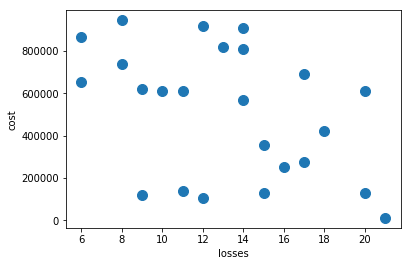

In [68]:
teams_pd.plot.scatter(x='losses', y='cost', s=100);

In [63]:
teams_pd.drop('name', axis=1, inplace=True)
teams_pd

,losses,cost
0,9,622059
1,11,610006
2,15,355431
3,10,612052
4,14,569244
5,15,128654
6,6,651429
7,16,251578
8,18,423005
9,20,128030


In [64]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[2.10834579, 2.09406481],
       [2.57686707, 2.05349026],
       [3.51390964, 1.19650314],
       [2.34260643, 2.0603778 ],
       [3.279649  , 1.91627133],
       [3.51390964, 0.43309367],
       [1.40556386, 2.19293434],
       [3.74817029, 0.84689818],
       [4.21669157, 1.4239805 ],
       [4.68521286, 0.43099307],
       [2.57686707, 0.46788147],
       [3.04538836, 2.75031345],
       [4.9194735 , 0.03825514],
       [1.40556386, 2.9085451 ],
       [3.279649  , 2.73028706],
       [3.98243093, 0.92938709],
       [2.81112771, 3.08474966],
       [1.87408514, 2.49150216],
       [4.68521286, 2.04958194],
       [3.98243093, 2.32179464],
       [2.81112771, 0.35950201],
       [3.279649  , 3.05338879],
       [1.87408514, 3.18143107],
       [2.10834579, 0.40819955]])

In [65]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[3.48044384, 2.55805527],
        [3.6076139 , 0.65346938],
        [1.94101675, 2.42604936]]),
 array([2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0,
        2, 1]))

In [66]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'b',
 'g',
 'b',
 'r',
 'g',
 'b',
 'g',
 'g',
 'g',
 'g',
 'r',
 'g',
 'b',
 'r',
 'g',
 'r',
 'b',
 'r',
 'r',
 'g',
 'r',
 'b',
 'g']

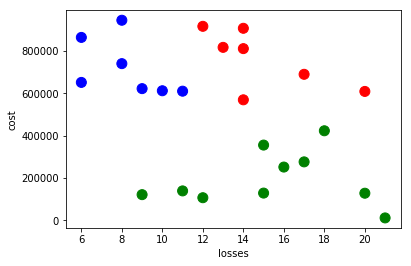

In [69]:
teams_pd.plot.scatter(x='losses', y='cost', c=colors, s=100)

In [70]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[2.49878019, 0.41186101],
        [4.16983944, 0.53572543],
        [1.73352876, 2.5736955 ],
        [2.88921459, 2.62210117],
        [3.9355788 , 1.78162631]]),
 array([2, 3, 4, 3, 4, 1, 2, 1, 4, 1, 0, 3, 1, 2, 3, 1, 3, 2, 4, 4, 0, 3,
        2, 0]))

In [71]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'y',
 'm',
 'y',
 'm',
 'g',
 'b',
 'g',
 'm',
 'g',
 'r',
 'y',
 'g',
 'b',
 'y',
 'g',
 'y',
 'b',
 'm',
 'm',
 'r',
 'y',
 'b',
 'r']

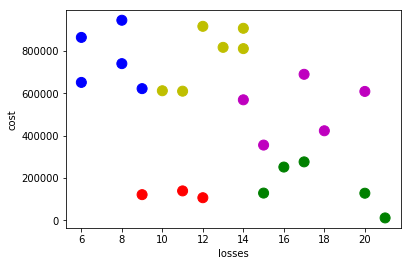

In [72]:
teams_pd.plot.scatter(x='losses', y='cost', c=colors, s=100)